## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Load the datasets

In [2]:
Distribution_data = pd.read_csv("ev_distribution_dataset.csv")
Geospatial_data = pd.read_csv("geospatial_dataset.csv")
Weather_data = pd.read_csv("weather_dataset.csv")

In [3]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [4]:
Geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [5]:
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


## Understand the structures of the datasets

In [6]:
Distribution_data.info()
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [7]:
Geospatial_data.info()
Geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [8]:
Weather_data.info()
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


## Exploratory Data Analysis

<b>This phase involves both Univariate and Bivariate Analysis</b>

<b>Univariate Analysis</b>
1. Visualize the distribution of electricity consumption.
2. Analyze the distribution of EV types, charging habits, customer type.

<b>Bivariate Analysis</b>

3. Use geospatial data to visualize the location of substations and EV charging stations.

4. Analyze the capacity of transmission lines.


<b>N/B:</b> Substations are the power-house of EV Charging stations.

## Univariate Analysis

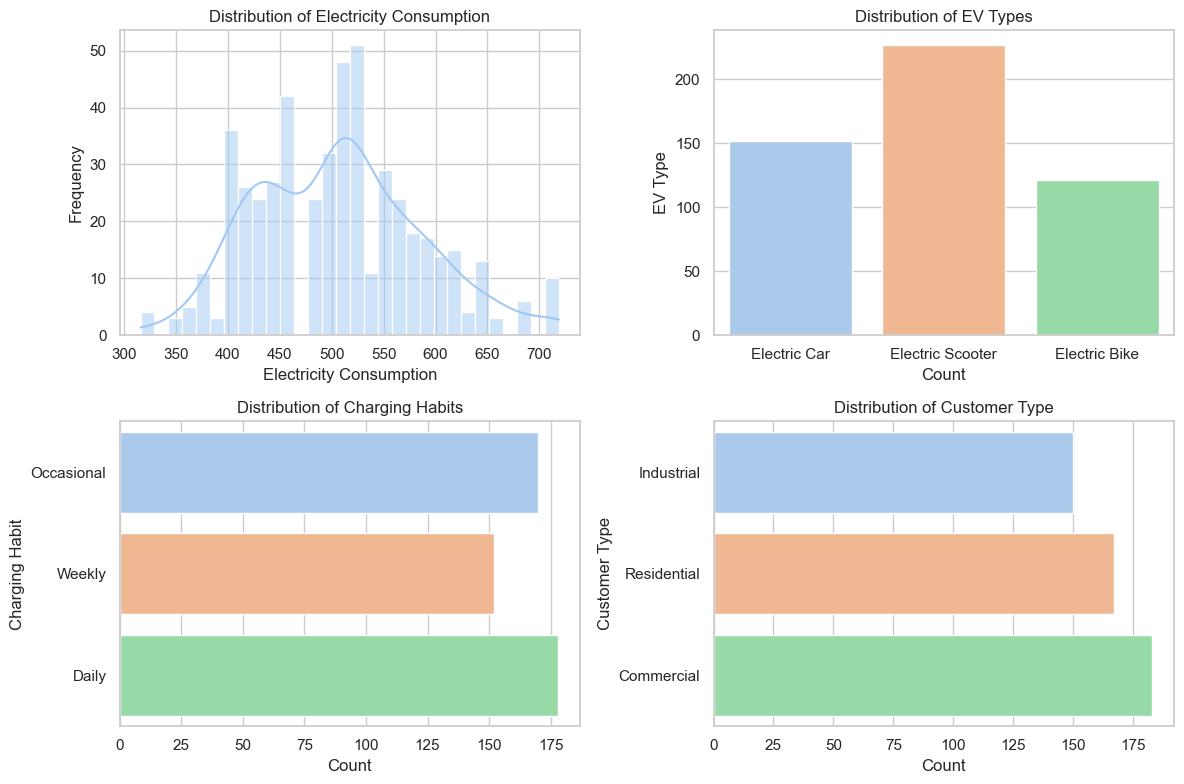

In [9]:
# Set style and color palette of plots
sns.set(style = "whitegrid")
sns.set_palette("pastel")

#Create a 2by2 subplot grid
fig, axes = plt.subplots(2,2, figsize= (12,8))

#Plot distribution of electricity consumption
sns.histplot(data= Distribution_data, x="Electricity_Consumption (kWh)", bins = 30,kde = True, ax=axes[0,0])
axes[0,0].set_title("Distribution of Electricity Consumption")
axes[0,0].set_xlabel("Electricity Consumption")
axes[0,0].set_ylabel("Frequency")

#Plot the distribution of EV types
sns.countplot(data = Distribution_data, x="EV_Type", ax=axes[0,1])
axes[0,1].set_title("Distribution of EV Types")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("EV Type")

#Plot the distribution of Charging Habits
sns.countplot(data=Distribution_data, y="Charging_Habit", ax=axes[1,0])
axes[1,0].set_title("Distribution of Charging Habits")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Charging Habit")


#Plot the distribution of Charging Habits
sns.countplot(data=Distribution_data, y="Customer_Type", ax=axes[1,1])
axes[1,1].set_title("Distribution of Customer Type")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Customer Type")

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()

### Bivariate Analysis

In [10]:
#Extract lat and long for ev charging stations
Distribution_data['ev_latitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
lambda x: float(x.split(",")[0].replace("(","").strip()))

Distribution_data['ev_longitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
lambda x:float(x.split(",")[1].replace(")","").strip()))

#extract the lat and long for the substation location
Geospatial_data['substation_latitude'] = Geospatial_data["Substation_Location"].apply(
lambda x:float(x.split(",")[0].replace("(","").strip()))

Geospatial_data['substation_longitude'] = Geospatial_data["Substation_Location"].apply(
lambda x:float(x.split(",")[1].replace(")","").strip()))

#drop the original location columns to clean up the datafraame
Distribution_data = Distribution_data.drop(columns =['EV_Charging_Station_Location'])
Geospatial_data = Geospatial_data.drop(columns = ['Substation_Location'])

In [11]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [12]:
Geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


C:\Users\ADMIN\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


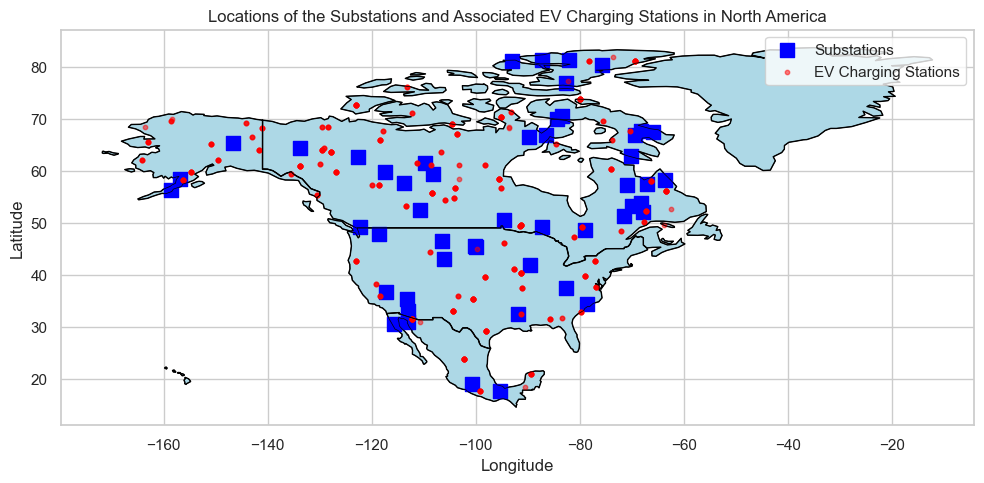

In [13]:
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the dataframes to GeoDataFrames
ev_geodataframe = gpd.GeoDataFrame(Distribution_data, 
                                   geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_geodataframe = gpd.GeoDataFrame(Geospatial_data, 
                                           geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america_countries = [
    'Canada', 'United States of America', 'Mexico', 
    'Greenland', 'Bermuda', 'Saint Pierre and Miquelon'
]
north_america = world[world['NAME'].isin(north_america_countries)]
    
# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_geodataframe.plot(ax=ax, marker='s', markersize=100, color='blue', label="Substations")

# Plotting EV charging stations on the map
ev_geodataframe.plot(ax=ax, markersize=10, color='red', label="EV Charging Stations", alpha=0.5)

# Plot title and axis labels
plt.title("Locations of the Substations and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
from shapely.geometry import LineString

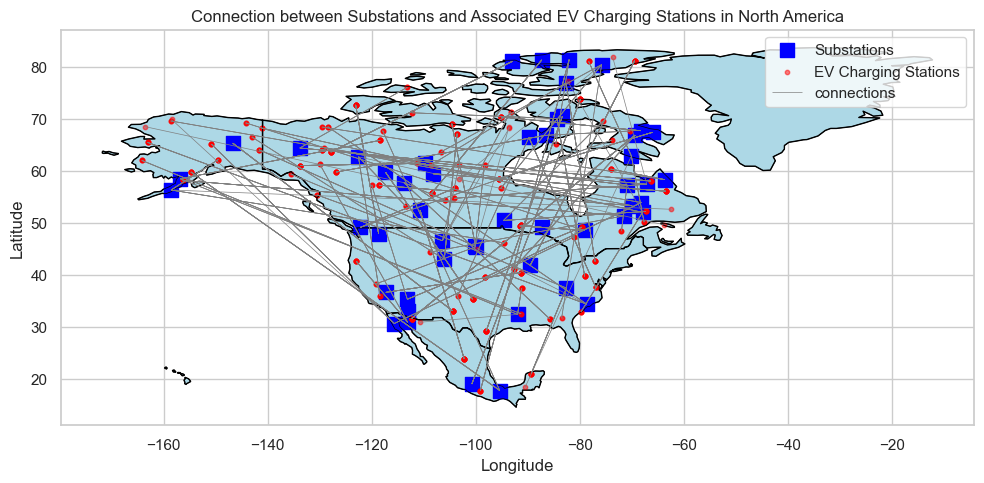

In [15]:
ev_geodataframe = gpd.GeoDataFrame(Distribution_data, 
                                   geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_geodataframe = gpd.GeoDataFrame(Geospatial_data, 
                                           geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

#Create lines connecting each substation to its associated ev charging station
lines= []
for _, ev_row in Distribution_data.iterrows():
    substation = Geospatial_data[Geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line=[(ev_row['ev_longitude'], ev_row['ev_latitude']),
     (substation['substation_longitude'], substation['substation_latitude'])] 
    lines.append(line)
                                   
line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])              
  
# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['NAME'].isin(north_america_countries)]
    
# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_geodataframe.plot(ax=ax, marker='s', markersize=100, color='blue', label="Substations")

# Plotting EV charging stations on the map
ev_geodataframe.plot(ax=ax, markersize=10, color='red', label="EV Charging Stations", alpha=0.5)

#Plotting line
line_gdf.plot(ax=ax, linewidth = 0.5, color="gray", label ='connections')
                                   
# Plot title and axis labels
plt.title("Connection between Substations and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()                                   

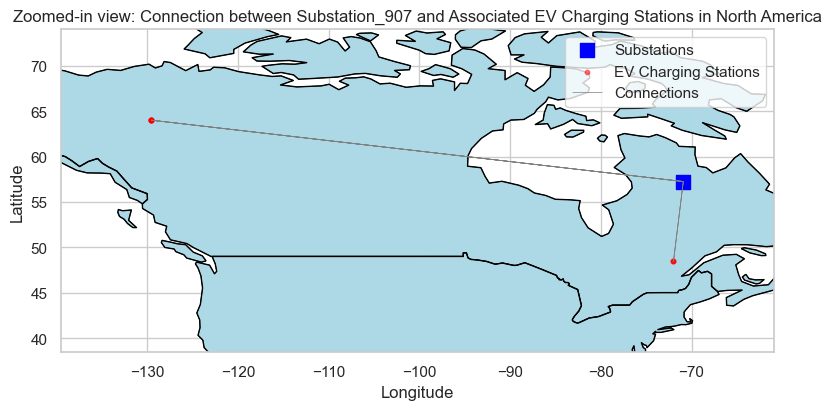

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Define the list of North American countries
north_america_countries = ["Canada", "United States of America", "Mexico"]

# Filter for the first substation
selected_substation = Geospatial_data.iloc[0]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude])
)

# Create lines connecting the substation to each EV charging station
lines_selected = [
    (ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected]
)

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['NAME'].isin(north_america_countries)]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label="Substations")

# Plotting EV charging stations on the map
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label="EV Charging Stations", alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color="gray", label='Connections')

# Setting zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plot title and axis labels
plt.title(f"Zoomed-in view: Connection between {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


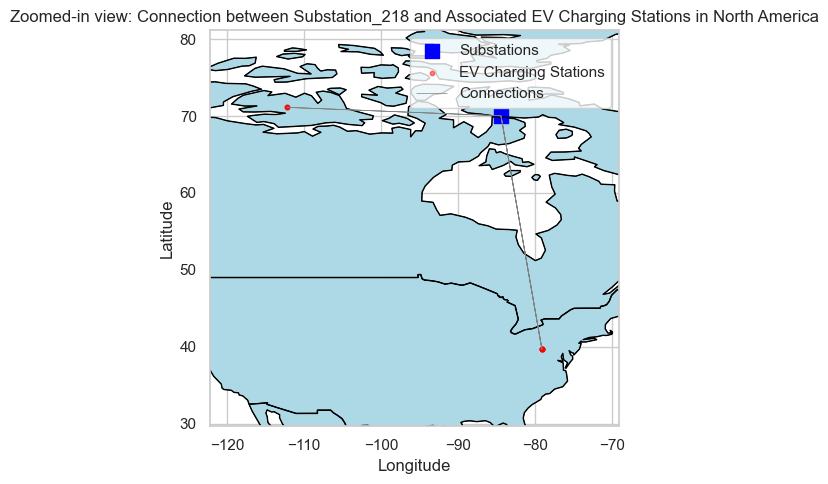

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Define the list of North American countries
north_america_countries = ["Canada", "United States of America", "Mexico"]

# Filter for the first substation
selected_substation = Geospatial_data.iloc[1]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude])
)

# Create lines connecting the substation to each EV charging station
lines_selected = [
    (ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected]
)

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['NAME'].isin(north_america_countries)]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label="Substations")

# Plotting EV charging stations on the map
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label="EV Charging Stations", alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color="gray", label='Connections')

# Setting zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plot title and axis labels
plt.title(f"Zoomed-in view: Connection between {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


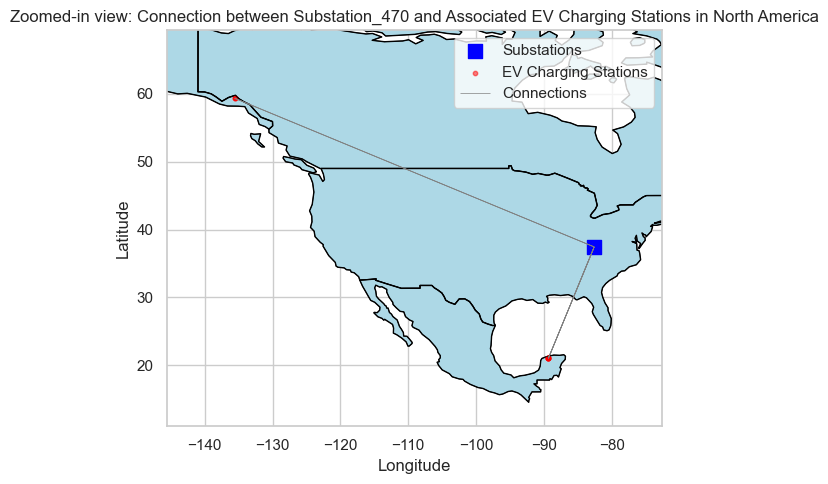

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Define the list of North American countries
north_america_countries = ["Canada", "United States of America", "Mexico"]

# Filter for the first substation
selected_substation = Geospatial_data.iloc[49]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude])
)

# Create lines connecting the substation to each EV charging station
lines_selected = [
    (ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected]
)

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['NAME'].isin(north_america_countries)]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label="Substations")

# Plotting EV charging stations on the map
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label="EV Charging Stations", alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color="gray", label='Connections')

# Setting zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plot title and axis labels
plt.title(f"Zoomed-in view: Connection between {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


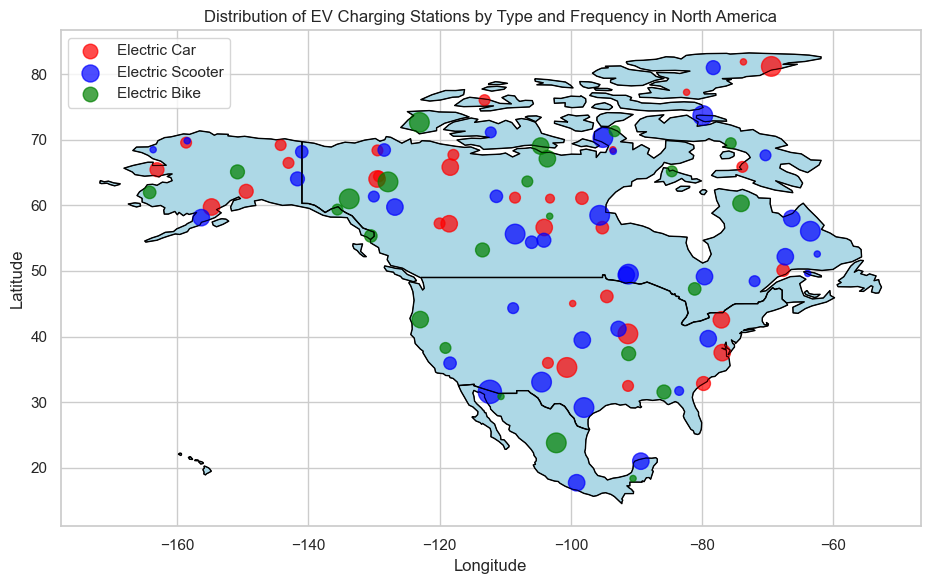

In [19]:
# Group by location and the EV type, then count the number of stations
grouped_data = Distribution_data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data, geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Define the list of North American countries
north_america_countries = ["Canada", "United States of America", "Mexico"]

# Filter the map to North America
north_america = world[world['NAME'].isin(north_america_countries)]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(12, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Define colors for the EV types
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting EV types
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count'] * 20, color=color, label=ev_type, alpha=0.7)

# Set title and axis labels
plt.title("Distribution of EV Charging Stations by Type and Frequency in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


The EV Types are widely spread out across North America

## Network Capacity Assessment
To perform network capacity assessment:

    1. Calculate the total electricity consumption for each susbstation
    2. Compare the total electricity consumption with the transmission line capacity.
    

In [20]:
#group the ev distribution data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#merging the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_data, total_consumption_per_substation, on = 'Substation_ID')

#Renaming the columns for better understanding
network_capacity_data.rename(columns ={'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace =True)

#Calculating the ratio of total consumption to transmission line Capacity
#conversion: 1MW = 1000Kwh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)']/(network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)


In [21]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [22]:
from shapely.geometry import Point

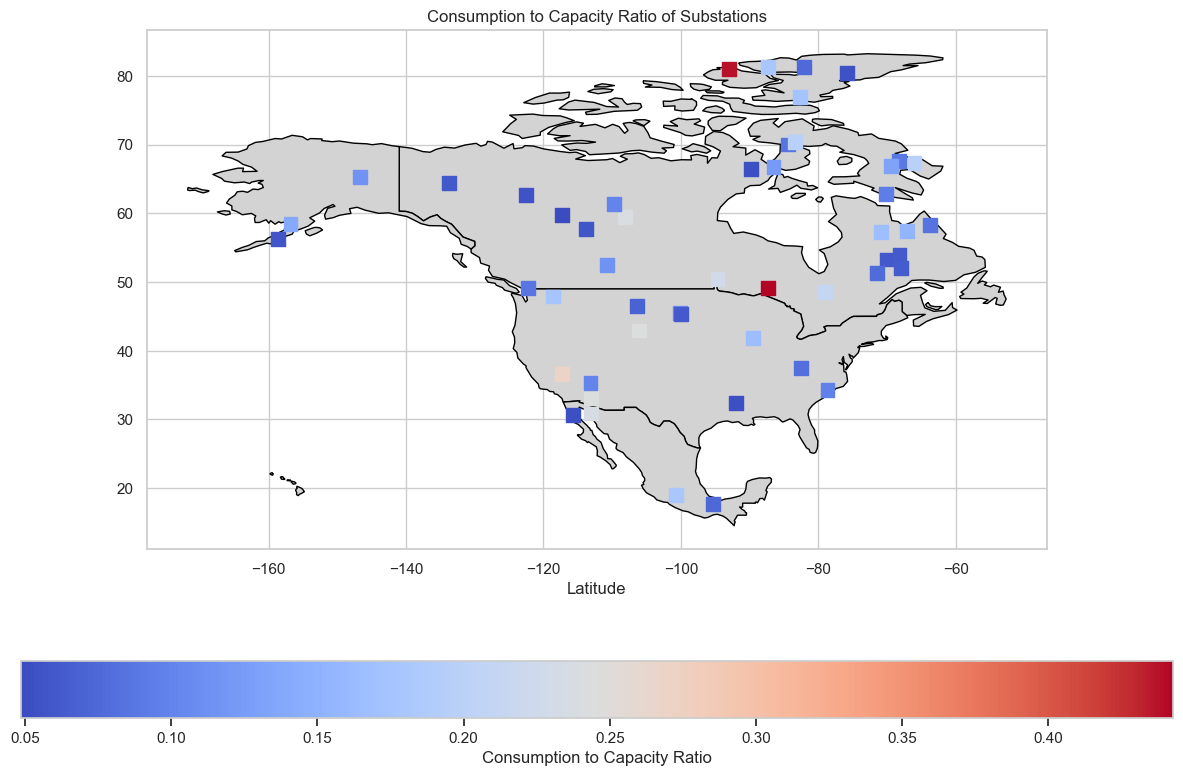

In [26]:
#Create the Geodataframe fro the network capacity for the dataframes
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry = geometry_network_capacity)

#plotting
fig, ax = plt.subplots(figsize =(12,8))
north_america.plot(ax=ax, color = 'lightgray', edgecolor = 'black')
gdf_network_capacity.plot(column = 'Consumption_to_Capacity_Ratio',cmap = 'coolwarm', legend = True,
                         marker = 's', markersize = 100, ax=ax, legend_kwds={'label': "Consumption to Capacity Ratio",'orientation': "horizontal"})

ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_xlabel("Latitude")
plt.tight_layout()
plt.show()

In [29]:
#groupby the substation_id for the number of evs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#merge network capacity data with ev counts
final_data = pd.merge(ev_counts, network_capacity_data, on = 'Substation_ID')

#Correlation
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

In [30]:
correlation_ratio

-0.10944923035990646

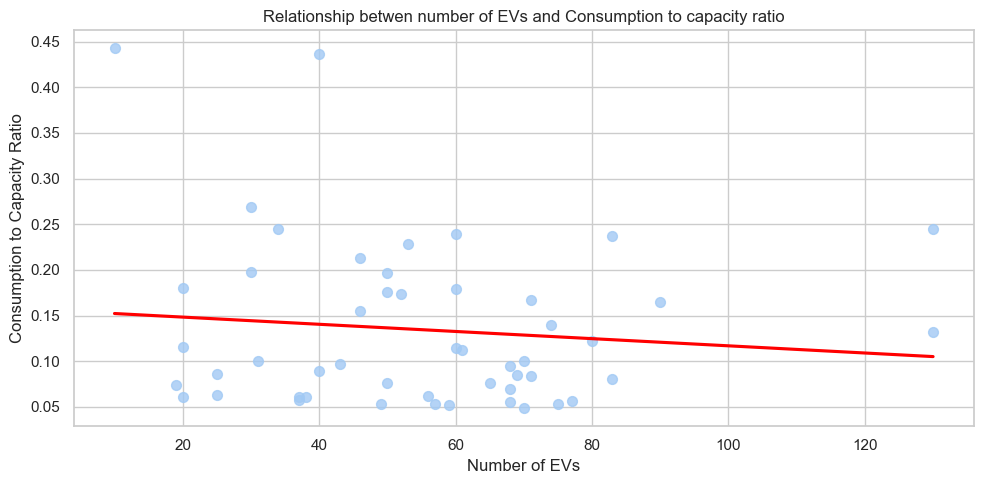

In [32]:
#scatterplot with regression line
plt.figure(figsize = (10,5))
sns.regplot(x='Number_of_EVs', y = 'Consumption_to_Capacity_Ratio', data = final_data, scatter_kws = {'s':50}, line_kws = {'color':'red'}, ci=None)
plt.title('Relationship betwen number of EVs and Consumption to capacity ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.tight_layout()
plt.show()

#Number of EVs doesn't lead to an overload.

## Identifying Bottlenecks

* By analyzing the map, we can identify the substations and areas that are potential bottlenecks on the distribution network. These are the areas where the consumption is high.

In [33]:
#Filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>= 0.9]

In [34]:
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio


## Optimizing Network Upgrades:

For optimizing network upgrades, focus on substations with potential to have high consumption_to_capacity _ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to have increased load effectively and ensuring grid reliability.

Additionally, let's note from the analysis:
* The Geographical distribution of EV charging stations; where EV charging stations are quite far from the substations.

Also, let the business look into:
* Potential future growth in EV adoption in different areas.
* Costs associated with different upgrade options.


In [35]:
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


## Correlation with Weather Data

* Analyzing the correlation between weather data and electricity consumption and if it can provide insights into how weather conditions affect the distribution

In [38]:
#merge weather data with distribution data
merged_data = pd.merge(Distribution_data, Weather_data, on = ['Timestamp', 'Substation_ID'])

#Calculate the correlation between weather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)','Precipitation (mm)']].corr()

#display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


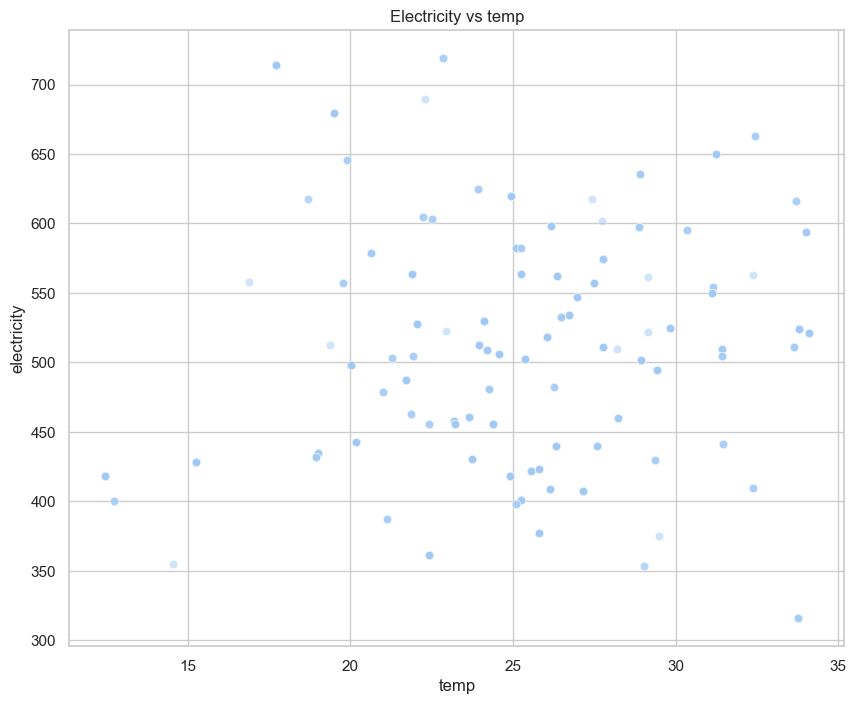

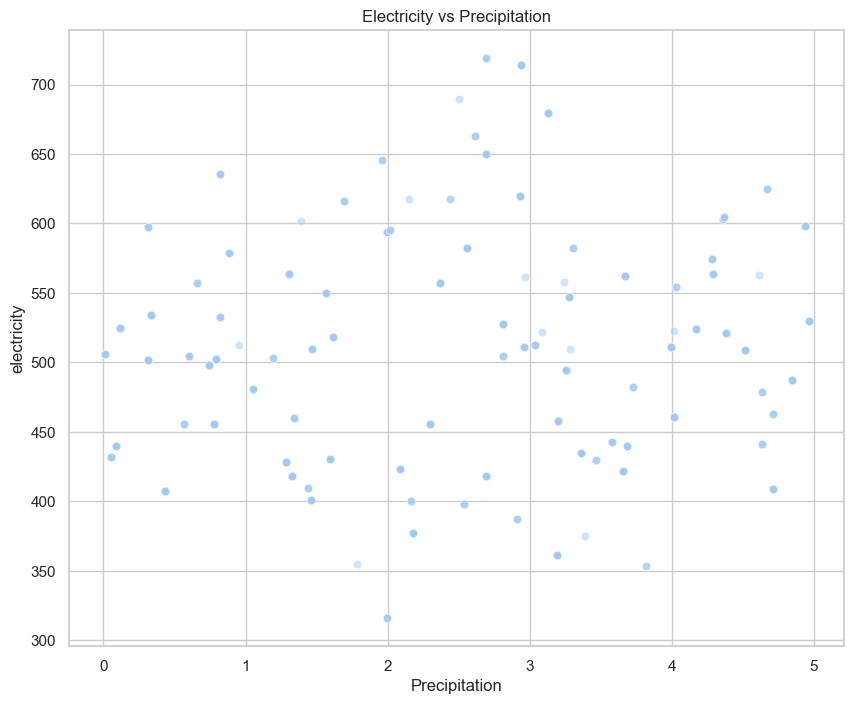

In [41]:
#Electricity consumption vs temp
plt.figure(figsize =(10,8))
sns.scatterplot(data = merged_data, x='Temperature (°C)',y = 'Electricity_Consumption (kWh)', alpha = 0.5)
plt.title("Electricity vs temp")
plt.xlabel("temp")
plt.ylabel("electricity")
plt.show()

#Electricity consumption vs precipitation
plt.figure(figsize=(10,8)) 
sns.scatterplot(data = merged_data, x = 'Precipitation (mm)', y = 'Electricity_Consumption (kWh)', alpha = 0.5)
plt.title("Electricity vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("electricity")
plt.show()

## Insights
1. <b>Electric consumption:</b> The electricity consumption is mostly centered around 500 kWh, with certain instances of high consumption. This indicates varied demand at different times and locations.
2. <b>EV Types and Charging Habits:</b> Electric scooters are the most common types of EVs. Most customers charge their EVs daily. Indicating a consistent daily load on the distribution network.
3. <b>Consumer Type:</b> Most Customers are commercial customers.
4. <b>Geospatial Distribution:</b> The spatial distribution of substations and EV charging stations is widespread.
5. <b>Geospatial Distribution:</b> The EV charging stations seems to be too far from their corresponding substation.
6. <b>Network Capacity:</b> Some substations have a high consumption to capacity ratio indicating potential bottlenecks and overloads in the network. There is also no correlation with the 
   number of EVs per substation and the consumption to capacity ratio, this shows that Number of EVs is not a factor for overload.
7. <b>Weather Correlation:</b> The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset suggesting that other factors
   might be more influential in affecting electricity consumption.


## The Optimization Strategy/ Recommendation
### This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.

1. <b>Prioritize Substation Upgrades:</b> Prioritize upgrades at substations where the Consumption_to_Capacity_Ratio is high, indicating potential overloads. Upgrade the transmission lines
   because the EV Charging Stations are too far from their corresponding substations.  
   
   
2. <b>Geospatial Analysis for Upgrading Planning:</b> Use geospatial to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capacity ratio) and geographical constraints.

3. <b>Demand Side Management: </b> Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing.

4. <b>Advanced Monitoring and Analysis: </b> Deploy advanced monitoring systems to continuously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.

5. <b>Cost-Benefit Analysis: </b> Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity and the impact on service reliability and customer satisfaction.

6. <b>Customer Engagement: </b> Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging. 


7. <b>Continuous Improvement: </b> Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders and use this feedback to make further improvements and optimizations.

By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and 
resilience of the distribution network and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.